# Covid-19 Tweets Classification

## About the Dataset
The dataset has been downloaded from Kaggle.\
Dataset Link: [Link to the dataset](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)\
The tweets have been pulled from Twitter and manual tagging has been done on them. The names and usernames have been given codes to avoid any privacy concerns.

**Columns**:
1) Location
2) Tweet At
3) Original Tweet
4) Sentiment


In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

In [197]:
# display full column value
pd.set_option('display.max_colwidth', None)

## Load the Datasets

In [285]:
df_train = pd.read_csv('data/Corona_NLP_train.csv', encoding='latin1')
df_test = pd.read_csv('data/Corona_NLP_test.csv')

In [286]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [287]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral


## Basic Data Information

In [134]:
df_train.shape

(41157, 6)

There are 41157 tweets in the training dataset.

In [135]:
df_test.shape

(3798, 6)

There are 3798 tweets in the test dataset.

In [136]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


There are missing values in the Location column in training dataset.

In [137]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


There are missing values in the Location column in test dataset.

## Duplicates

In [138]:
print("Training duplicates:", df_train.duplicated().sum())
print("Test duplicates:", df_test.duplicated().sum())

Training duplicates: 0
Test duplicates: 0


There are NO duplicate entries in both the training and test datasets.

## Missing Values

In [139]:
df_train.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

- In the training dataset, there are 8590 missing values in Location.
- Percentage of missing values: 8590/len(df_train)*100 = 20.87%

In [140]:
df_test.isnull().sum().sort_values(ascending=False)

Location         834
UserName           0
ScreenName         0
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

- In the test dataset, there are 834 missing values in Location. 
- Percentage of missing values: 834/len(df_test)*100 = 21.96%

We won't be handling these missing values because we are working on text-classification and our main concern is with the `OriginalTweet` column. 

## Exploratory Data Analysis

### Descriptive Statistics 

In [141]:
df_train.describe(include='object')

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Positive
freq,540,3448,1,11422


There are 5 unique Sentiment labels in the training set.

In [142]:
df_test.describe(include='object')

,Location,TweetAt,OriginalTweet,Sentiment
count,2964,3798,3798,3798
unique,1717,15,3798,5
top,United States,13-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Negative
freq,75,1233,1,1041


There are 5 unique Sentiment labels in the test set.

### Unique Sentiment labels

In [143]:
df_train['Sentiment'].unique().tolist()

['Neutral', 'Positive', 'Extremely Negative', 'Negative', 'Extremely Positive']

In [144]:
df_test['Sentiment'].unique().tolist()

['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative', 'Neutral']

Following are the unique Sentiments:
- Extremely Negative
- Negative
- Neutral
- Positive
- Extremely Positive

### Distribution of Sentiment

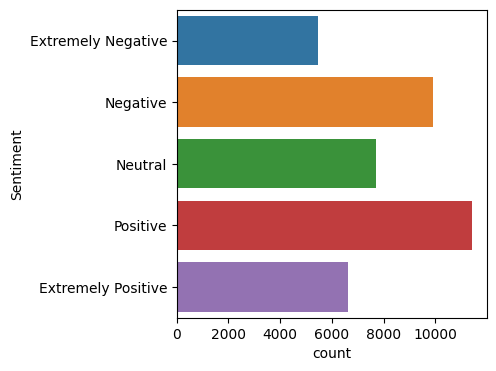

In [145]:
# Create a countplot to show the distribution of sentiments, order them from Extremely Negative to Extremely Positive
fig = plt.figure(figsize=(4, 4))
sns.countplot(y='Sentiment', data=df_train, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.show()

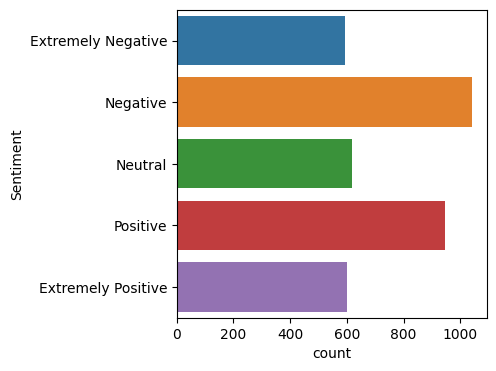

In [146]:
# Create a countplot to show the distribution of sentiments, order them from Extremely Negative to Extremely Positive
fig = plt.figure(figsize=(4, 4))
sns.countplot(y='Sentiment', data=df_test, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.show()

## Text Pre-processing

We'll remove the unnecessary columns from the training and test sets.

In [288]:
df_train = df_train[['OriginalTweet', 'Sentiment']]
df_train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [289]:
df_test = df_test[['OriginalTweet', 'Sentiment']]
df_test.head()

,OriginalTweet,Sentiment
0,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?\r\r\n\r\r\nhttps://t.co/IASiReGPC4\r\r\n\r\r\n#QAnon #QAnon2018 #QAnon2020 \r\r\n#Election2020 #CDC https://t.co/29isZOewxu,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral


### Perform the following pre-processing steps on tweets
1. Remove punctuation, URLs, and stop words.
2. Convert the text into lower case.
3. Apply lemmatization.
4. Tokenize the text. 

In [290]:
# Function to remove punctuations from text
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def remove_punctuation(text):
    regular_punct = string.punctuation
    #return re.sub(r'[#!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', '', str(text))
    return str(re.sub(r'['+regular_punct+']', '', str(text)))

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http[s]?://\S+', '', text)

# Function to remove stop words from text
def remove_stop_words(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)

  filtered_sentence = ''

  for w in word_tokens:
	  if w not in stop_words:
		  filtered_sentence = filtered_sentence + w + ' '
          
  return filtered_sentence

# Function to convert the text into lower case
def lower_case(text):
    return text.lower()

# Function to lemmatize text
def lemmatize(text):
  wordnet_lemmatizer = WordNetLemmatizer()

  tokens = nltk.word_tokenize(text)
  lemma_txt = ''
  for w in tokens:
    lemma_txt = lemma_txt + wordnet_lemmatizer.lemmatize(w) + ' '

  return lemma_txt

# Function to tokenize text
def tokenize(text):
    return nltk.word_tokenize(text)   

In [291]:
# Apply preprocessing steps to 'OriginalTweet' column in df_train
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(remove_urls)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(remove_punctuation)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(remove_stop_words)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lower_case)
df_train['OriginalTweet'] = df_train['OriginalTweet'].apply(lemmatize)

df_train.head()

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv,Neutral
1,advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order,Positive
2,coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid19 outbreak,Positive
3,my food stock one empty please dont panic there will be enough food for everyone take need stay calm stay safe covid19france covid19 covid19 coronavirus confinement confinementotal confinementgeneral,Positive
4,me ready go supermarket covid19 outbreak not im paranoid food stock litteraly empty the coronavirus serious thing please dont panic it cause shortage coronavirusfrance restezchezvous stayathome confinement,Extremely Negative


In [292]:
# Apply preprocessing steps to 'OriginalTweet' column in df_test
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(remove_urls)
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(remove_punctuation)
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(remove_stop_words)
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lower_case)
df_test['OriginalTweet'] = df_test['OriginalTweet'].apply(lemmatize)

df_test.head()

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermarket shelf pictured wegmans brooklyn soldout online grocer foodkick maxdelivery coronavirusfearing shopper stock,Extremely Negative
1,when i couldnt find hand sanitizer fred meyer i turned amazon but 11497 2 pack purellcheck coronavirus concern driving price,Positive
2,find protect loved one coronavirus,Extremely Positive
3,panic buying hit newyork city anxious shopper stock foodampmedical supply healthcare worker 30 becomes bigapple 1st confirmed coronavirus patient or bloomberg staged event qanon qanon2018 qanon2020 election2020 cdc,Negative
4,toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid19 9news corvid19 7newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper,Neutral


## Naive Bayes Classifier

In [181]:
from sklearn import feature_extraction
from sklearn.metrics import confusion_matrix
from sklearn import model_selection as ms
from sklearn import naive_bayes
from sklearn.metrics import classification_report

### Encode the text by word count 

In [293]:
counts = feature_extraction.text.CountVectorizer()
X = counts.fit_transform(df_train['OriginalTweet'].values)
X.shape

(41157, 58351)

In [294]:
y = df_train['Sentiment'].values
y.shape

(41157,)

### Train a Naive Bayes Classifier

In [295]:
# train test split the data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
nb_model = naive_bayes.MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [297]:
nb_model.score(X_train, y_train)

0.7423234624145786

In [298]:
nb_model.score(X_test, y_test)

0.467201166180758

#### **Test Accuracy: 46.72%**

Test Accuracy is not satisfactory. Let's use hyperparameter tuning to improve the accuracy of our model.

### Hyperparameter Tuning of the Naive Bayes Classifier

In [299]:
import optuna
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define objective function for hyperparameter optimization
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.0, 1.0)
    
    # Initialize and train Multinomial Naive Bayes classifier with the chosen alpha
    naive_bayes = MultinomialNB(alpha=alpha)
    naive_bayes.fit(X_train, y_train)
    
    # Evaluate accuracy on validation set
    y_pred = naive_bayes.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define study and optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-17 06:21:12,716] A new study created in memory with name: no-name-4729ce6f-012e-4369-82df-58e65794ddef


[I 2024-03-17 06:21:13,146] Trial 0 finished with value: 0.4748542274052478 and parameters: {'alpha': 0.30295531210480775}. Best is trial 0 with value: 0.4748542274052478.
[I 2024-03-17 06:21:13,271] Trial 1 finished with value: 0.46987366375121475 and parameters: {'alpha': 0.19280844019045085}. Best is trial 0 with value: 0.4748542274052478.
[I 2024-03-17 06:21:13,381] Trial 2 finished with value: 0.47339650145772594 and parameters: {'alpha': 0.8092778684322488}. Best is trial 0 with value: 0.4748542274052478.
[I 2024-03-17 06:21:13,531] Trial 3 finished with value: 0.4586977648202138 and parameters: {'alpha': 0.07168938264552382}. Best is trial 0 with value: 0.4748542274052478.
[I 2024-03-17 06:21:13,651] Trial 4 finished with value: 0.4776482021379981 and parameters: {'alpha': 0.4352754385476897}. Best is trial 4 with value: 0.4776482021379981.
[I 2024-03-17 06:21:13,798] Trial 5 finished with value: 0.4780126336248785 and parameters: {'alpha': 0.6161259030305453}. Best is trial 5 w

In [300]:
# Get the best hyperparameters
best_params = study.best_params
best_params

{'alpha': 0.6447207649436705}

In [301]:
nb_model = MultinomialNB(**best_params)
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.6447207649436705)

In [303]:
nb_model.score(X_test, y_test)

0.47910592808551994

#### **Test Accuracy: 47.91%**

Hyperparameter tuning didn't improve the accuracy much. Let's use TF-IDF vectorizer and Logistic Regression to improve the performance of our model.

## TF_IDF Vectorizer & Logistic Regression

In [304]:
tfidf = feature_extraction.text.TfidfVectorizer()
X = tfidf.fit_transform(df_train['OriginalTweet'])
X.shape

(41157, 58351)

In [305]:
y = df_train['Sentiment']
y.shape

(41157,)

In [306]:
# train test split the data
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

LogisticRegression()

In [308]:
y_pred = lr_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5698493683187561

#### **Test Accuracy: 56.98%**

Using TF_IDF and Logistic Regression, the accuracy has been improved by almost 10% but it's still not satisfactory. Let's use Support Vector Classifier to improve further. 

## Support Vector Classifier

In [309]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [310]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5894071914480078

#### **Test Accuracy: 58.94%**

Support Vector Classifier improved the accuracy by only 2%. 

## Confusion Matrix

In [311]:
y_pred = svc_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 443,    3,  497,   40,   73],
       [   3,  605,   36,   25,  661],
       [ 130,   21, 1200,  232,  423],
       [   6,   11,  233,  984,  319],
       [  27,  120,  303,  217, 1620]], dtype=int64)

#### Classification Report

In [312]:
sentiments = df_train['Sentiment'].unique()
print(classification_report(y_test, y_pred, target_names=sentiments))

                    precision    recall  f1-score   support

           Neutral       0.73      0.42      0.53      1056
          Positive       0.80      0.45      0.58      1330
Extremely Negative       0.53      0.60      0.56      2006
          Negative       0.66      0.63      0.65      1553
Extremely Positive       0.52      0.71      0.60      2287

          accuracy                           0.59      8232
         macro avg       0.65      0.56      0.58      8232
      weighted avg       0.62      0.59      0.59      8232



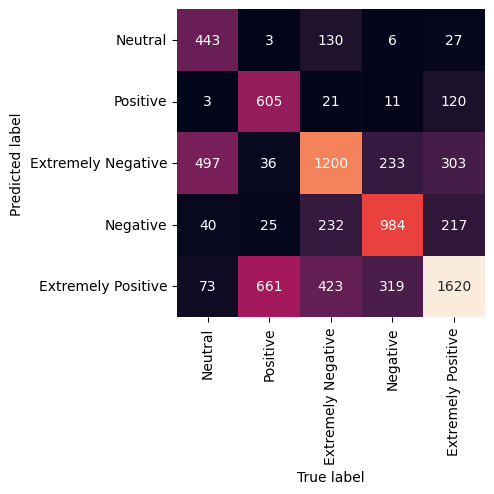

In [313]:
cm = confusion_matrix(y_test, svc_model.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=sentiments,
            yticklabels=sentiments
           )
plt.xlabel('True label')
plt.ylabel('Predicted label');